In [70]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from pandas.api.types import CategoricalDtype
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

## data exploration

In [71]:

df=pd.read_csv('train_v9rqX0R.csv')
df_test=pd.read_csv('test1.csv')
df.head(30)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [72]:
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [73]:
#lets find out the missing value, its percentage and data type 
#lets find out the missing value, its percentage and data type 
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/len(df))*100).sort_values(ascending=True)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
nan=missing_data[missing_data["Total"]>0].index
missing_data=missing_data[missing_data["Total"]>0]
nan=pd.DataFrame(nan, columns=['nan col'])
nan
j=[]
for i in nan['nan col']:
    j.append(df[i].dtype)
j=pd.DataFrame(j,columns=['type'])
nan=pd.concat([nan,j],axis=1).set_index('nan col')
nan=pd.concat([missing_data,nan],axis=1)
nan

,Total,Percent,type
nan col,,,
Outlet_Size,2410,28.276428,object
Item_Weight,1463,17.165317,float64


In [74]:
j=[]
col=df.columns
for i in col:
    j.append(df[i].dtype)
j=pd.DataFrame(j,columns=['type'])

num=[]
cat=[]
for i in col:
    
    #numerical=df12[df12[i].dtype !='object']
    if (df[i].dtype =='object')==True:
        cat.append(i)
    else:
        num.append(i)
num=pd.DataFrame(num,columns=['numerical'])
cat=pd.DataFrame(cat,columns=['categorical'])
num
    #    
#print(num)
#seperating numerical data into temporal data
year=[]
for i in num['numerical']:    
    if 'yr'in i or 'YR' in i or 'YEAR' in i or 'year'in i or 'Year'in i or'Yr' in i:
        year.append(i)
year=pd.DataFrame(year,columns=['Year'])
print(num)

                   numerical
0                Item_Weight
1            Item_Visibility
2                   Item_MRP
3  Outlet_Establishment_Year
4          Item_Outlet_Sales


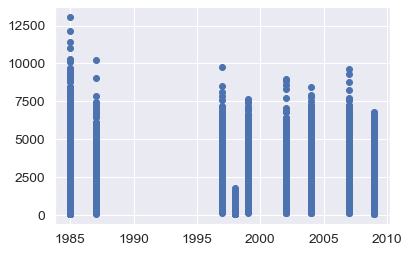

In [75]:
plt.scatter(df['Outlet_Establishment_Year'],df['Item_Outlet_Sales'])

Item_Weight
Item_Visibility
Item_MRP
Outlet_Establishment_Year
Item_Outlet_Sales


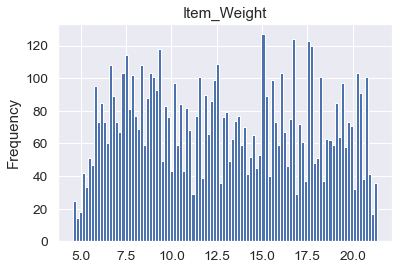

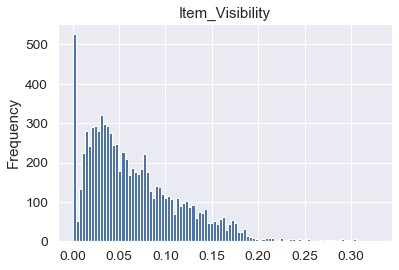

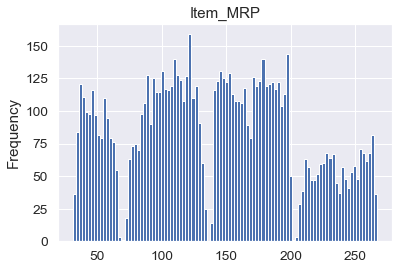

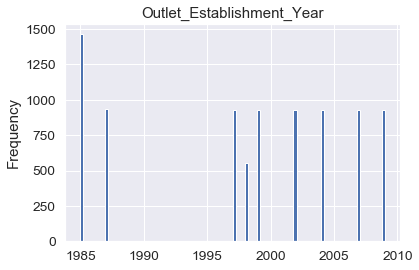

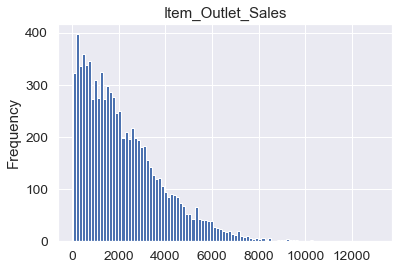

In [76]:
for i in num['numerical']:
    print(i)
    plt.figure()
    df[i].plot.hist(bins=100)
    plt.title(i)
    plt.show

In [77]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [78]:
gkk = df.groupby('Outlet_Size')
sm=gkk.get_group('Small')
smg=sm[sm['Outlet_Type']=='Supermarket Type1']
smg['Outlet_Location_Type'].unique()
#sm['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 2'], dtype=object)

In [79]:
x=sm['Outlet_Identifier']#.dropna()
y=sm['Outlet_Size']#.dropna().value_counts()
print(len(x),len(y))
x2=x1.value_counts()
print(x2)


2388 2388


NameError: name 'x1' is not defined

In [ ]:
gkkb= df.groupby('Outlet_Size')
smb=gkkb.get_group('Medium')
xb=smb[smb['Outlet_Establishment_Year']==1985]#.dropna()
yb=smb['Outlet_Size']#.dropna().value_counts()
#x3=xb.value_counts()
print(xb['Outlet_Location_Type'].unique())

In [ ]:
gkkb= df.groupby('Outlet_Size')
smb=gkkb.get_group('High')
smb['Outlet_Establishment_Year'].unique()

In [ ]:
df['Outlet_Identifier'].unique()

In [ ]:
13,27,49,18,35,46,19

In [ ]:
'OUT010',  'OUT045',
       'OUT017',  
    

In [ ]:
#df10=df[df['Outlet_Establishment_Year']==2002]
print('year',df10['Outlet_Establishment_Year'].unique())
print('type',df10['Outlet_Type'].unique())
print('location',df10['Outlet_Location_Type'].unique())

In [ ]:
gkkm = df.groupby('Outlet_Size')
smm=gkkm.get_group('Small')
xm=smm['Outlet_Identifier']#.dropna()
ym=smm['Item_Outlet_Sales']#.dropna().value_counts()
plt.bar(xm,ym)
plt.show()
print(ym.mean())

In [ ]:
gkkm = df.groupby('Outlet_Size')
smm=gkkm.get_group('Medium')
xm=smm['Outlet_Identifier']#.dropna()
ym=smm['Item_Outlet_Sales']#.dropna().value_counts()
plt.bar(xm,ym)
plt.show()
print(ym.mean())

In [ ]:
gkkm = df.groupby('Outlet_Size')
smm=gkkm.get_group('High')
xm=smm['Outlet_Identifier']#.dropna()
ym=smm['Item_Outlet_Sales']#.dropna().value_counts()
plt.bar(xm,ym)
plt.show()
print(ym.mean())

In [80]:
print('df',df.shape)
print('df_test',df_test.shape)

df (8523, 12)
df_test (5681, 11)


In [81]:
df10=df[df['Outlet_Identifier']=='OUT017']
print('year',df10['Outlet_Establishment_Year'].unique())
print('location_type',df10['Outlet_Location_Type'].unique())
print('Outlet_Type',df10['Outlet_Type'].unique())


year [2007]
location_type ['Tier 2']
Outlet_Type ['Supermarket Type1']


In [82]:
print('out017',df10['Item_Outlet_Sales'].mean())
df45=df[df['Outlet_Identifier']=='OUT045']  
print('out045',df45['Item_Outlet_Sales'].mean())
df010=df[df['Outlet_Identifier']=='OUT010'] 
print('out010',df010['Item_Outlet_Sales'].mean())

out017 2340.67526349892
out045 2192.3847976318607
out010 339.3516619819822


# missing data handling

In [83]:
#the features with missing values are:
nan=nan.reset_index()
print(nan)

       nan col  Total    Percent     type
0  Outlet_Size   2410  28.276428   object
1  Item_Weight   1463  17.165317  float64


In [84]:
df['Outlet_Size'] = df['Outlet_Size'].fillna('Small')


In [85]:
it1=df['Item_Type'].unique()
it1

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [86]:
#we will create data frame for every item in column 'Item_Type'
#dairy
item = df.groupby('Item_Type')
item1=item.get_group('Dairy')
i1=item1['Item_Identifier']
i2=item1['Item_Weight']
dairy=pd.DataFrame(list(zip(i1, i2)),columns=['Item_Identifier','Item_Weight'])
#print(dairy)
#'Soft Drinks'
item = df.groupby('Item_Type')
item1=item.get_group('Soft Drinks')
i1=item1['Item_Identifier']
i2=item1['Item_Weight']
Soft_Drinks=pd.DataFrame(list(zip(i1, i2)),columns=['Item_Identifier','Item_Weight'])
#print(Soft_Drinks)
#Meat
item = df.groupby('Item_Type')
item1=item.get_group('Meat')
i1=item1['Item_Identifier']
i2=item1['Item_Weight']
Meat=pd.DataFrame(list(zip(i1, i2)),columns=['Item_Identifier','Item_Weight'])
#print(Meat)
#Meat
item = df.groupby('Item_Type')
item1=item.get_group('Fruits and Vegetables')
i1=item1['Item_Identifier']
i2=item1['Item_Weight']
Fruits_and_Vegetables=pd.DataFrame(list(zip(i1, i2)),columns=['Item_Identifier','Item_Weight'])
#print(Fruits_and_Vegetables)
#Household
item = df.groupby('Item_Type')
item1=item.get_group('Household')
i1=item1['Item_Identifier']
i2=item1['Item_Weight']
Household=pd.DataFrame(list(zip(i1, i2)),columns=['Item_Identifier','Item_Weight'])
#print(Household)
#Baking Goods
item = df.groupby('Item_Type')
item1=item.get_group('Baking Goods')
i1=item1['Item_Identifier']
i2=item1['Item_Weight']
Baking_Goods=pd.DataFrame(list(zip(i1, i2)),columns=['Item_Identifier','Item_Weight'])
#print(Baking_Goods)
#Baking Goods
item = df.groupby('Item_Type')
item1=item.get_group('Snack Foods')
i1=item1['Item_Identifier']
i2=item1['Item_Weight']
Snack_Foods=pd.DataFrame(list(zip(i1, i2)),columns=['Item_Identifier','Item_Weight'])
print(Snack_Foods)
#Frozen Foods
item = df.groupby('Item_Type')
item1=item.get_group('Frozen Foods')
i1=item1['Item_Identifier']
i2=item1['Item_Weight']
Frozen_Foods=pd.DataFrame(list(zip(i1, i2)),columns=['Item_Identifier','Item_Weight'])
print(Frozen_Foods)
#Breakfast
item = df.groupby('Item_Type')
item1=item.get_group('Breakfast')
i1=item1['Item_Identifier']
i2=item1['Item_Weight']
Breakfast=pd.DataFrame(list(zip(i1, i2)),columns=['Item_Identifier','Item_Weight'])
print(Breakfast)
#Health and Hygiene
item = df.groupby('Item_Type')
item1=item.get_group('Health and Hygiene')
i1=item1['Item_Identifier']
i2=item1['Item_Weight']
Health_and_Hygiene=pd.DataFrame(list(zip(i1, i2)),columns=['Item_Identifier','Item_Weight'])
print(Health_and_Hygiene)
#Hard Drinks
item = df.groupby('Item_Type')
item1=item.get_group('Hard Drinks')
i1=item1['Item_Identifier']
i2=item1['Item_Weight']
Hard_Drinks=pd.DataFrame(list(zip(i1, i2)),columns=['Item_Identifier','Item_Weight'])
print(Hard_Drinks)
#Canned
item = df.groupby('Item_Type')
item1=item.get_group('Canned')
i1=item1['Item_Identifier']
i2=item1['Item_Weight']
Canned=pd.DataFrame(list(zip(i1, i2)),columns=['Item_Identifier','Item_Weight'])
print(Canned)
#Breads
item = df.groupby('Item_Type')
item1=item.get_group('Breads')
i1=item1['Item_Identifier']
i2=item1['Item_Weight']
Breads=pd.DataFrame(list(zip(i1, i2)),columns=['Item_Identifier','Item_Weight'])
print(Breads)
#Starchy Foods
item = df.groupby('Item_Type')
item1=item.get_group('Starchy Foods')
i1=item1['Item_Identifier']
i2=item1['Item_Weight']
Starchy_Foods=pd.DataFrame(list(zip(i1, i2)),columns=['Item_Identifier','Item_Weight'])
print(Starchy_Foods)
#Others
item = df.groupby('Item_Type')
item1=item.get_group('Others')
i1=item1['Item_Identifier']
i2=item1['Item_Weight']
Others=pd.DataFrame(list(zip(i1, i2)),columns=['Item_Identifier','Item_Weight'])
print(Others)
#Seafood
item = df.groupby('Item_Type')
item1=item.get_group('Seafood')
i1=item1['Item_Identifier']
i2=item1['Item_Weight']
Seafood=pd.DataFrame(list(zip(i1, i2)),columns=['Item_Identifier','Item_Weight'])
print(Seafood)


     Item_Identifier  Item_Weight
0              FDO10       13.650
1              FDP10          NaN
2              FDS46       17.600
3              FDN22       18.850
4              FDV10        7.645
...              ...          ...
1195           FDW21        5.340
1196           FDB46       10.500
1197           FDN58       13.800
1198           FDF22        6.865
1199           FDN46        7.210

[1200 rows x 2 columns]
    Item_Identifier  Item_Weight
0             FDH17       16.200
1             FDU28       19.200
2             FDR28       13.850
3             FDM40       10.195
4             FDY40          NaN
..              ...          ...
851           FDC05       13.100
852           FDZ28       20.000
853           FDN28        5.880
854           FDF05       17.500
855           FDF53       20.750

[856 rows x 2 columns]
    Item_Identifier  Item_Weight
0             FDP49        9.000
1             FDP49        9.000
2             FDQ49          NaN
3             F

In [87]:
gg=Seafood.groupby('Item_Identifier')

In [88]:
it1

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [89]:
sf=dairy['Item_Identifier'].unique()
s1 = pd.DataFrame([])
for i in sf:
    s2=dairy[dairy['Item_Identifier']==i].mode()
    s1=s1.append(s2,ignore_index=True)
sf=Soft_Drinks['Item_Identifier'].unique()
for i in sf:
    s2=Soft_Drinks[Soft_Drinks['Item_Identifier']==i].mode()
    s1=s1.append(s2,ignore_index=True)
sf=Meat['Item_Identifier'].unique()
for i in sf:
    s2=Meat[Meat['Item_Identifier']==i].mode()
    s1=s1.append(s2,ignore_index=True)
    
sf=Fruits_and_Vegetables['Item_Identifier'].unique()
for i in sf:
    s2=Fruits_and_Vegetables[Fruits_and_Vegetables['Item_Identifier']==i].mode()
    s1=s1.append(s2,ignore_index=True)
    
sf=Household['Item_Identifier'].unique()
for i in sf:
    s2=Household[Household['Item_Identifier']==i].mode()
    s1=s1.append(s2,ignore_index=True)
    
sf=Baking_Goods['Item_Identifier'].unique()
for i in sf:
    s2=Baking_Goods[Baking_Goods['Item_Identifier']==i].mode()
    s1=s1.append(s2,ignore_index=True)
    
sf=Snack_Foods['Item_Identifier'].unique()
for i in sf:
    s2=Snack_Foods[Snack_Foods['Item_Identifier']==i].mode()
    s1=s1.append(s2,ignore_index=True)
    
sf=Frozen_Foods['Item_Identifier'].unique()
for i in sf:
    s2=Frozen_Foods[Frozen_Foods['Item_Identifier']==i].mode()
    s1=s1.append(s2,ignore_index=True)
    
sf=Breakfast['Item_Identifier'].unique()
for i in sf:
    s2=Breakfast[Breakfast['Item_Identifier']==i].mode()
    s1=s1.append(s2,ignore_index=True)
    
sf=Health_and_Hygiene['Item_Identifier'].unique()
for i in sf:
    s2=Health_and_Hygiene[Health_and_Hygiene['Item_Identifier']==i].mode()
    s1=s1.append(s2,ignore_index=True)
    
sf=Hard_Drinks['Item_Identifier'].unique()
for i in sf:
    s2=Hard_Drinks[Hard_Drinks['Item_Identifier']==i].mode()
    s1=s1.append(s2,ignore_index=True)
    
sf=Canned['Item_Identifier'].unique()
for i in sf:
    s2=Canned[Canned['Item_Identifier']==i].mode()
    s1=s1.append(s2,ignore_index=True)
    
sf=Breads['Item_Identifier'].unique()
for i in sf:
    s2=Breads[Breads['Item_Identifier']==i].mode()
    s1=s1.append(s2,ignore_index=True)
    
sf=Starchy_Foods['Item_Identifier'].unique()
for i in sf:
    s2=Starchy_Foods[Starchy_Foods['Item_Identifier']==i].mode()
    s1=s1.append(s2,ignore_index=True)
    
sf=Others['Item_Identifier'].unique()
for i in sf:
    s2=Others[Others['Item_Identifier']==i].mode()
    s1=s1.append(s2,ignore_index=True)
    
sf=Seafood['Item_Identifier'].unique()
for i in sf:
    s2=Seafood[Seafood['Item_Identifier']==i].mode()
    s1=s1.append(s2,ignore_index=True)
    
    
print(s1)

     Item_Identifier  Item_Weight
0              FDA15        9.300
1              FDA03       18.500
2              FDU02       13.350
3              FDE51        5.925
4              FDV38       19.250
...              ...          ...
1554           FDI57       19.850
1555           FDK45       11.650
1556           FDH09       12.600
1557           FDI09       20.750
1558           FDF33        7.970

[1559 rows x 2 columns]


In [90]:
for j,i in s1.iterrows():
    w=i['Item_Weight']
    n=i['Item_Identifier']
    df.loc[df.Item_Identifier == n, 'Item_Weight'] = w
df[df['Item_Identifier'] == 'FDA15']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
831,FDA15,9.3,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,Small,Tier 2,Supermarket Type1,5976.2208
2599,FDA15,9.3,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392
2643,FDA15,9.3,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208
4874,FDA15,9.3,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,Small,Tier 3,Grocery Store,498.0184
5413,FDA15,9.3,Low Fat,0.016009,Dairy,250.6092,OUT013,1987,High,Tier 3,Supermarket Type1,6474.2392
6696,FDA15,9.3,Low Fat,0.015945,Dairy,249.5092,OUT027,1985,Medium,Tier 3,Supermarket Type3,6474.2392
7543,FDA15,9.3,LF,0.016113,Dairy,248.8092,OUT017,2007,Small,Tier 2,Supermarket Type1,5976.2208


In [91]:
df[df['Item_Identifier'] == 'FDV38']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
30,FDV38,19.25,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,Small,Tier 3,Grocery Store,163.7868
127,FDV38,19.25,Low Fat,0.102350,Dairy,52.7956,OUT017,2007,Small,Tier 2,Supermarket Type1,928.1252
2395,FDV38,19.25,Low Fat,0.101281,Dairy,55.0956,OUT027,1985,Medium,Tier 3,Supermarket Type3,2020.0372
3684,FDV38,19.25,Low Fat,0.101689,Dairy,54.6956,OUT013,1987,High,Tier 3,Supermarket Type1,163.7868
4224,FDV38,19.25,Low Fat,0.101755,Dairy,55.1956,OUT035,2004,Small,Tier 2,Supermarket Type1,491.3604
5015,FDV38,19.25,Low Fat,0.102188,Dairy,54.3956,OUT018,2009,Medium,Tier 3,Supermarket Type2,1201.1032
6172,FDV38,19.25,LF,0.101980,Dairy,54.3956,OUT045,2002,Small,Tier 2,Supermarket Type1,873.5296
7813,FDV38,19.25,Low Fat,0.178193,Dairy,54.9956,OUT019,1985,Small,Tier 1,Grocery Store,109.1912
8168,FDV38,19.25,Low Fat,0.101932,Dairy,54.5956,OUT049,1999,Medium,Tier 1,Supermarket Type1,764.3384


In [92]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350


In [93]:

df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].median())

In [94]:

total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/len(df))*100).sort_values(ascending=True)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
nan=missing_data[missing_data["Total"]>0].index
missing_data=missing_data[missing_data["Total"]>0]
nan=pd.DataFrame(nan, columns=['nan col'])
nan
j=[]
for i in nan['nan col']:
    j.append(df[i].dtype)
j=pd.DataFrame(j,columns=['type'])
nan=pd.concat([nan,j],axis=1).set_index('nan col')
nan=pd.concat([missing_data,nan],axis=1)
nan

,Total,Percent,type
nan col,,,


In [95]:
total = df.isnull().sum().sort_values(ascending=False)
total

Item_Outlet_Sales            0
Outlet_Type                  0
Outlet_Location_Type         0
Outlet_Size                  0
Outlet_Establishment_Year    0
Outlet_Identifier            0
Item_MRP                     0
Item_Type                    0
Item_Visibility              0
Item_Fat_Content             0
Item_Weight                  0
Item_Identifier              0
dtype: int64

# handling categorical data

In [96]:
uni=df['Item_Identifier'].unique()
fat=df['Item_Fat_Content'].unique()
item_type=df['Item_Type'].unique()
Outlet_Identifier=df['Outlet_Identifier'].unique()
Outlet_Size=df['Outlet_Size'].unique()
location=df['Outlet_Location_Type'].unique()
Outlet_Type=df['Outlet_Type'].unique()
year=df['Outlet_Establishment_Year'].unique()


In [97]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'})
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [98]:
df1=df.copy()
df1['Item_Identifier'] = df1['Item_Identifier'].astype(CategoricalDtype(categories=uni, ordered = True)).cat.codes
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].astype(CategoricalDtype(categories=fat, ordered = True)).cat.codes
df1['Item_Type'] = df1['Item_Type'].astype(CategoricalDtype(categories=item_type, ordered = True)).cat.codes
df1['Outlet_Identifier'] = df1['Outlet_Identifier'].astype(CategoricalDtype(categories=Outlet_Identifier, ordered = True)).cat.codes
df1['Outlet_Size'] = df1['Outlet_Size'].astype(CategoricalDtype(categories=Outlet_Size, ordered = True)).cat.codes
df1['Outlet_Location_Type'] = df1['Outlet_Location_Type'].astype(CategoricalDtype(categories=location, ordered = True)).cat.codes
df1['Outlet_Type'] = df1['Outlet_Type'].astype(CategoricalDtype(categories=Outlet_Type, ordered = True)).cat.codes
df1['Outlet_Establishment_Year'] = df1['Outlet_Establishment_Year'].astype(CategoricalDtype(categories=year, ordered = True)).cat.codes


In [99]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,9.30,0,0.016047,0,249.8092,0,0,0,0,0,3735.1380
1,1,5.92,1,0.019278,1,48.2692,1,1,0,1,1,443.4228
2,2,17.50,0,0.016760,2,141.6180,0,0,0,0,0,2097.2700
3,3,19.20,1,0.000000,3,182.0950,2,2,1,1,2,732.3800
4,4,8.93,0,0.000000,4,53.8614,3,3,2,1,0,994.7052


In [100]:
df1.head(30)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,9.300,0,0.016047,0,249.8092,0,0,0,0,0,3735.1380
1,1,5.920,1,0.019278,1,48.2692,1,1,0,1,1,443.4228
2,2,17.500,0,0.016760,2,141.6180,0,0,0,0,0,2097.2700
3,3,19.200,1,0.000000,3,182.0950,2,2,1,1,2,732.3800
4,4,8.930,0,0.000000,4,53.8614,3,3,2,1,0,994.7052
5,5,10.395,1,0.000000,5,51.4008,1,1,0,1,1,556.6088
6,6,13.650,1,0.012741,6,57.6588,3,3,2,1,0,343.5528
7,7,19.000,0,0.127470,6,107.7622,4,4,0,1,3,4022.7636
8,8,16.200,1,0.016687,7,96.9726,5,5,1,2,0,1076.5986
9,9,19.200,1,0.094450,7,187.8214,6,6,1,2,0,4710.5350


Item_Identifier
Item_Weight
Item_Fat_Content
Item_Visibility
Item_Type
Item_MRP
Outlet_Identifier
Outlet_Establishment_Year
Outlet_Size
Outlet_Location_Type
Outlet_Type
Item_Outlet_Sales


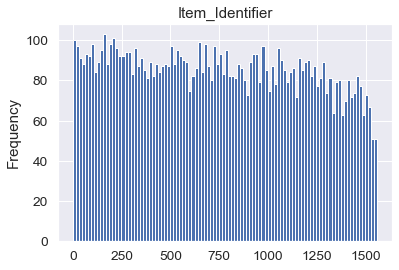

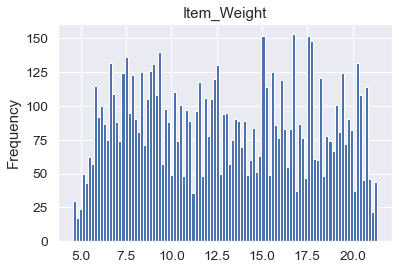

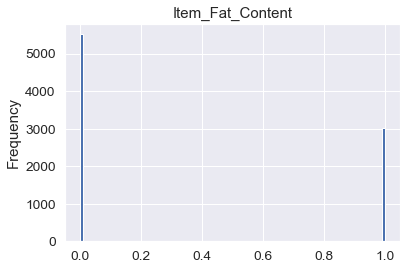

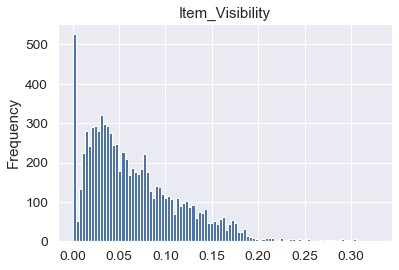

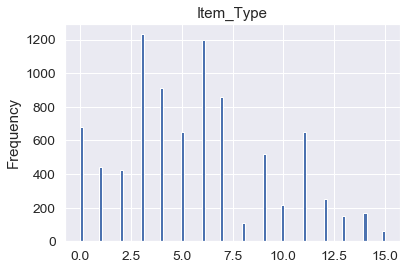

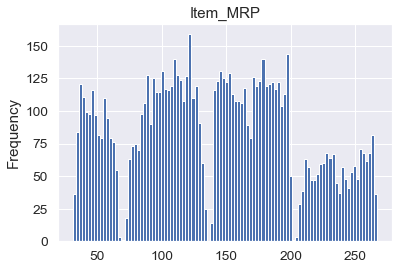

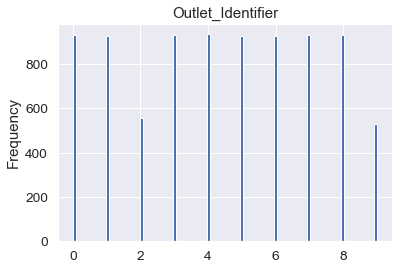

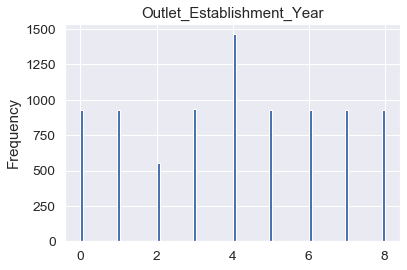

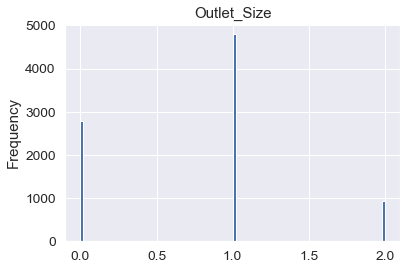

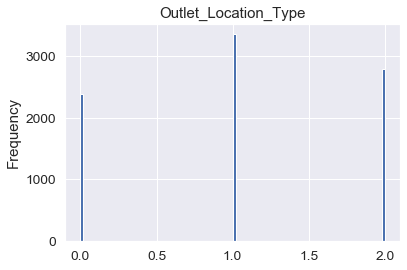

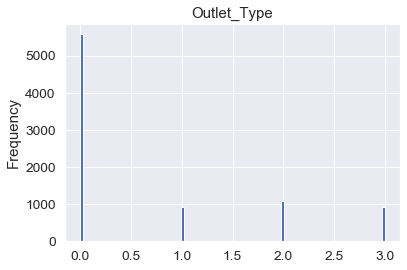

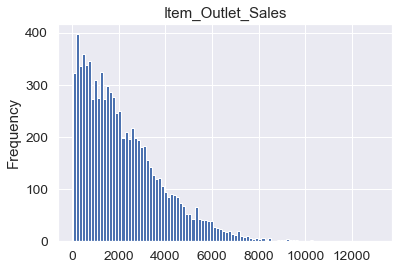

In [101]:
col=df1.columns
for i in col:
    print(i)
    plt.figure()
    df1[i].plot.hist(bins=100)
    plt.title(i)
    plt.show

In [102]:
df1['Item_Visibility']=df1['Item_Visibility']+1

# data transformation


In [103]:
from scipy import stats
t1 = pd.DataFrame(zip(df1['Item_Outlet_Sales'],df1['Item_MRP'],df1['Item_Visibility']))
new = df1[['Item_Outlet_Sales', 'Item_MRP', 'Item_Visibility','Item_Weight']].copy()
train_data1 ,fitted_lambda = stats.boxcox(new['Item_Outlet_Sales'])
train_data2 ,fitted_lambda = stats.boxcox(new['Item_MRP'])
train_data3 ,fitted_lambda = stats.boxcox(new['Item_Visibility'])
train_data4 ,fitted_lambda = stats.boxcox(new['Item_Weight'])
train_data3

array([0.01486632, 0.01759258, 0.015475  , ..., 0.0298628 , 0.07960142,
       0.03648771])

In [104]:
train_data1=pd.DataFrame(train_data1,columns=['Item_Outlet_Sales'])
train_data2=pd.DataFrame(train_data2,columns=['Item_MRP'])
train_data3=pd.DataFrame(train_data3,columns=['Item_Visibility'])
train_data1

,Item_Outlet_Sales
0,47.007885
1,20.958294
2,37.964893
3,25.485930
4,28.660858
...,...
8518,42.145847
8519,22.794301
8520,30.712790
8521,36.195026


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

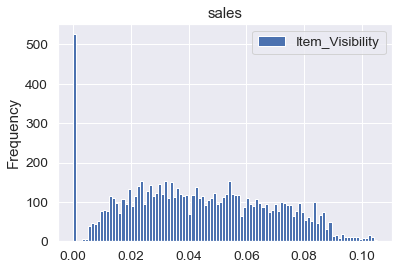

In [105]:
    plt.figure()
    train_data3.plot.hist(bins=100)
    plt.title('sales')
    plt.show

In [106]:
df1['Item_Outlet_Sales']=train_data1
df1['Item_MRP']=train_data2
df1['Item_Visibility']=train_data3
df1['Item_Weight']=train_data4

In [107]:
df1['Item_Outlet_Sales']

0       47.007885
1       20.958294
2       37.964893
3       25.485930
4       28.660858
          ...    
8518    42.145847
8519    22.794301
8520    30.712790
8521    36.195026
8522    25.926287
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

Item_Identifier
Item_Weight
Item_Fat_Content
Item_Visibility
Item_Type
Item_MRP
Outlet_Identifier
Outlet_Establishment_Year
Outlet_Size
Outlet_Location_Type
Outlet_Type
Item_Outlet_Sales


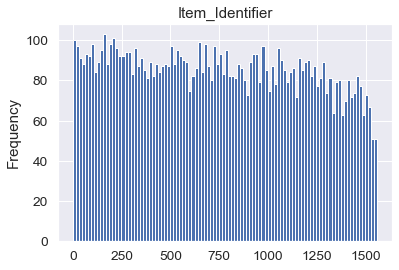

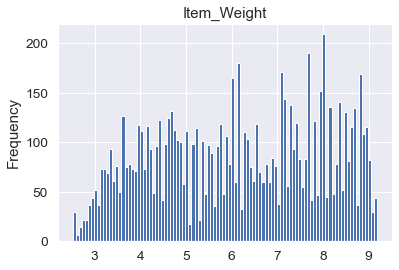

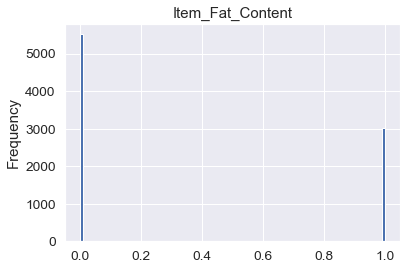

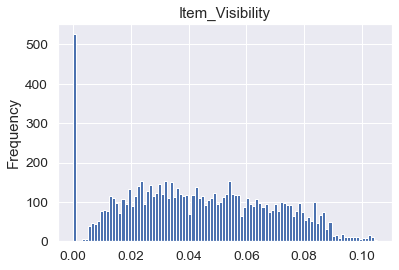

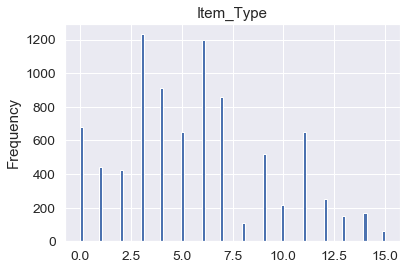

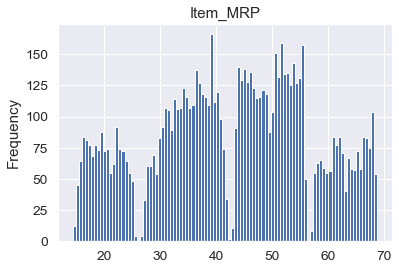

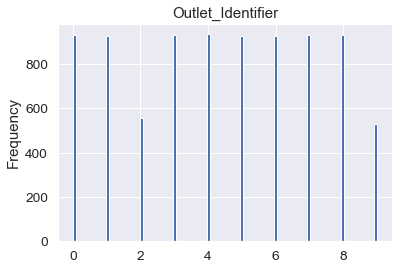

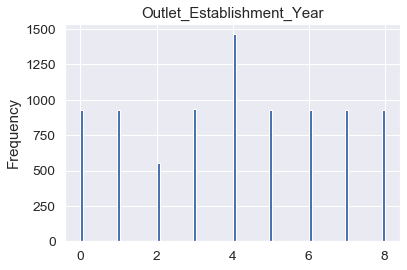

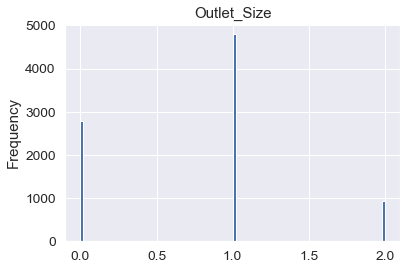

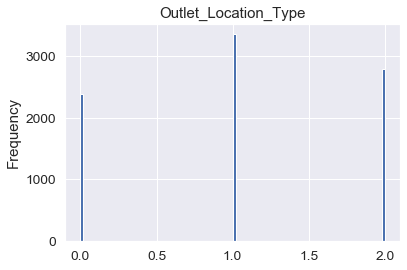

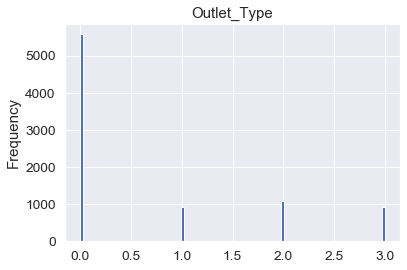

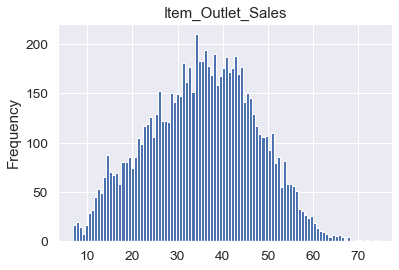

In [108]:
col=df1.columns
for i in col:
    print(i)
    plt.figure()
    df1[i].plot.hist(bins=100)
    plt.title(i)
    plt.show

In [109]:
df['Item_Outlet_Sales']

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

# correlation heat map


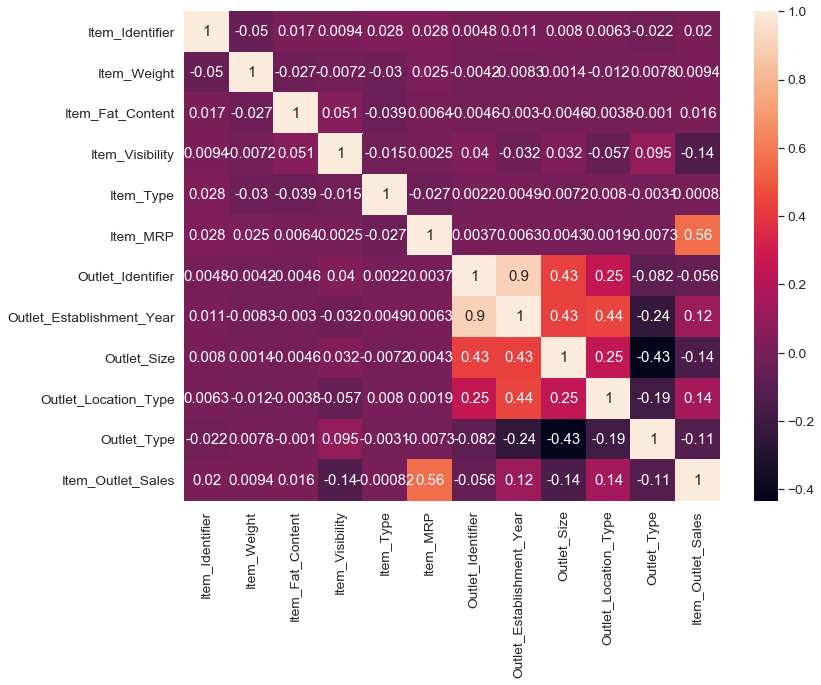

In [110]:
corrmat = df1.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.set(font_scale=1.25)
sns.heatmap(corrmat,annot=True);

# train test split 

In [111]:
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,4.828311,0,0.014866,0,65.652445,0,0,0,0,0,47.007885
1,1,3.251898,1,0.017593,1,19.920687,1,1,0,1,1,20.958294
2,2,7.928958,0,0.015475,2,43.751419,0,0,0,0,0,37.964893
3,3,8.495079,1,0.000000,3,52.395806,2,2,1,1,2,25.485930
4,4,4.667818,0,0.000000,4,21.614642,3,3,2,1,0,28.660858
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,359,3.720837,0,0.043851,6,58.902813,3,3,2,1,0,42.145847
8519,1537,4.424520,1,0.037849,5,36.018696,5,5,1,2,0,22.794301
8520,354,5.374011,0,0.029863,9,30.265789,8,8,1,2,0,30.712790
8521,908,3.885858,1,0.079601,6,34.798598,1,1,0,1,1,36.195026


In [112]:
df1.drop(['Outlet_Identifier','Item_Identifier'],axis=1,inplace=True)

In [113]:
df1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,4.828311,0,0.014866,0,65.652445,0,0,0,0,47.007885
1,3.251898,1,0.017593,1,19.920687,1,0,1,1,20.958294
2,7.928958,0,0.015475,2,43.751419,0,0,0,0,37.964893
3,8.495079,1,0.000000,3,52.395806,2,1,1,2,25.485930
4,4.667818,0,0.000000,4,21.614642,3,2,1,0,28.660858
...,...,...,...,...,...,...,...,...,...,...
8518,3.720837,0,0.043851,6,58.902813,3,2,1,0,42.145847
8519,4.424520,1,0.037849,5,36.018696,5,1,2,0,22.794301
8520,5.374011,0,0.029863,9,30.265789,8,1,2,0,30.712790
8521,3.885858,1,0.079601,6,34.798598,1,0,1,1,36.195026


In [114]:
y=df1['Item_Outlet_Sales']
#df1=df1.drop(['Item_Outlet_Sales','Item_Weight','Item_Identifier','Item_Visibility','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Type'],axis=1)
df1=df1.drop(['Item_Outlet_Sales'],axis=1)
x=df1.copy()

In [115]:
#df1=df1.drop(['Outlet_Type','Outlet_Size'],axis=1)

In [116]:
x=df1.copy()

In [117]:
x['Item_MRP']=df['Item_MRP']
y=df['Item_Outlet_Sales']
x['Outlet_Years']=2018-x['Outlet_Establishment_Year']
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,4.828311,0,0.014866,0,249.8092,0,0,0,0,2018
1,3.251898,1,0.017593,1,48.2692,1,0,1,1,2017
2,7.928958,0,0.015475,2,141.6180,0,0,0,0,2018
3,8.495079,1,0.000000,3,182.0950,2,1,1,2,2016
4,4.667818,0,0.000000,4,53.8614,3,2,1,0,2015
...,...,...,...,...,...,...,...,...,...,...
8518,3.720837,0,0.043851,6,214.5218,3,2,1,0,2015
8519,4.424520,1,0.037849,5,108.1570,5,1,2,0,2013
8520,5.374011,0,0.029863,9,85.1224,8,1,2,0,2010
8521,3.885858,1,0.079601,6,103.1332,1,0,1,1,2017


In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=43) #to be used for intial training and testing
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [119]:
print(X_train.shape,X_test.shape)
df_test['Outlet_Years']=2018-df_test['Outlet_Establishment_Year']
df_test.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)
x.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)
y=df['Item_MRP']
print(x.columns,df_test.columns)


(6392, 10) (2131, 10)
Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Outlet_Years'],
      dtype='object') Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Years'],
      dtype='object')


In [120]:
df_test.drop(['Outlet_Identifier','Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
print(x.shape,df_test.shape)

(8523, 9) (5681, 9)


# model training


In [122]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_features=9,max_depth=10, random_state=10)
regr.fit(x,y)
y_pred=regr.predict(df_test)


In [123]:
y_pred

array([107.83979646,  87.33039639, 241.74467502, ..., 118.71083772,
       214.61985495,  79.79958527])

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))

rms

In [124]:
import xgboost
regressor=xgboost.XGBRegressor()
booster=['gbtree','gblinear']
base_score=[0.25,0.50,0.75,1]
n_estimators=[100,500,900,1100,1500]
max_depth=[2,3,5,10,15]
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
hyperparameter_grid={
          'n_estimators':n_estimators,
           'max_depth':max_depth,
           'learning_rate':learning_rate,
            'min_child_weight':min_child_weight,
            'booster':booster,
            'base_score':base_score    
}
random_cv=RandomizedSearchCV(estimator=regressor,
                            param_distributions=hyperparameter_grid,
                            cv=5,n_iter=50,
                            scoring='neg_mean_absolute_error',
                            n_jobs=4,
                            verbose=5,
                            return_train_score=True,
                            random_state=42)
random_cv.fit(x,y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   19.1s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  4.0min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  6.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbt

In [125]:
random_cv.best_estimator_

XGBRegressor(base_score=1, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.2, max_delta_step=None, max_depth=2,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=1500, n_jobs=0, num_parallel_tree=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=0, scale_pos_weight=1, subsample=None, tree_method=None,
             validate_parameters=False, verbosity=None)

In [126]:
random_cv.best_params_


{'n_estimators': 1500,
 'min_child_weight': 3,
 'max_depth': 2,
 'learning_rate': 0.2,
 'booster': 'gblinear',
 'base_score': 1}

In [128]:
regressor=xgboost.XGBRegressor(base_score=1, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.2, max_delta_step=0, max_depth=2,
             min_child_weight=3, missing=None, monotone_constraints=None,
              n_jobs=0, num_parallel_tree=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=0, scale_pos_weight=1, subsample=None, tree_method=None,
             validate_parameters=False, verbosity=None,n_estimators= 1500,
            )


In [129]:
regressor.fit(x,y)

XGBRegressor(base_score=1, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.2, max_delta_step=0, max_depth=2,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=1500, n_jobs=0, num_parallel_tree=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=0, scale_pos_weight=1, subsample=None, tree_method=None,
             validate_parameters=False, verbosity=None)

In [ ]:
print(len(y_train),len(y_test))

In [130]:
y_pred=regressor.predict(df_test)

In [ ]:
from sklearn import metrics
rms = sqrt(metrics.mean_squared_error(y_test, y_pred))
rms

In [132]:
y_pred

array([107.861496,  87.31856 , 241.75244 , ..., 118.74465 , 214.62039 ,
        79.79665 ], dtype=float32)

In [133]:
y_pred=pd.DataFrame(y_pred,columns=['Item_Outlet_Sales'])
#df_test=pd.concat([df_test,y_pred],axis=1)
#df_test

In [134]:
df_test1=pd.read_csv('test_AbJTz2l.csv')
df_test1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [135]:
Item_Identifier=df_test1[['Item_Identifier']]
Outlet_Identifier=df_test1[['Outlet_Identifier']]
df_test3=pd.concat([Item_Identifier,Outlet_Identifier,y_pred],axis=1)

In [136]:
df_test3

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,107.861496
1,FDW14,OUT017,87.318558
2,NCN55,OUT010,241.752441
3,FDQ58,OUT017,155.032684
4,FDY38,OUT027,234.229553
...,...,...,...
5676,FDB58,OUT046,141.315674
5677,FDD47,OUT018,169.145157
5678,NCO17,OUT045,118.744652
5679,FDJ26,OUT017,214.620392


In [137]:
df_test3.to_csv(r'C:\Users\Siddharth\Desktop\Data Science\competition\big mart\submission_final.csv', index = False)

In [138]:
gm=pd.read_csv('submission_final.csv')

In [139]:
gm

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,107.861496
1,FDW14,OUT017,87.318560
2,NCN55,OUT010,241.752440
3,FDQ58,OUT017,155.032680
4,FDY38,OUT027,234.229550
...,...,...,...
5676,FDB58,OUT046,141.315670
5677,FDD47,OUT018,169.145160
5678,NCO17,OUT045,118.744650
5679,FDJ26,OUT017,214.620390
